<a href="https://colab.research.google.com/github/Ewana10/TNSDC/blob/main/Image%20classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_223_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r2_244_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r2_243_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r2_148_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_201_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_137_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_60_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/29_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_195_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/r_193_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/308_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry Wedge/211_100.jpg
/kaggle/input/fruits/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/137_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/111_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_70_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_79_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/108_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/115_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_38_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_49_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_33_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_325_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/r_63_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/127_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 1/100_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple G

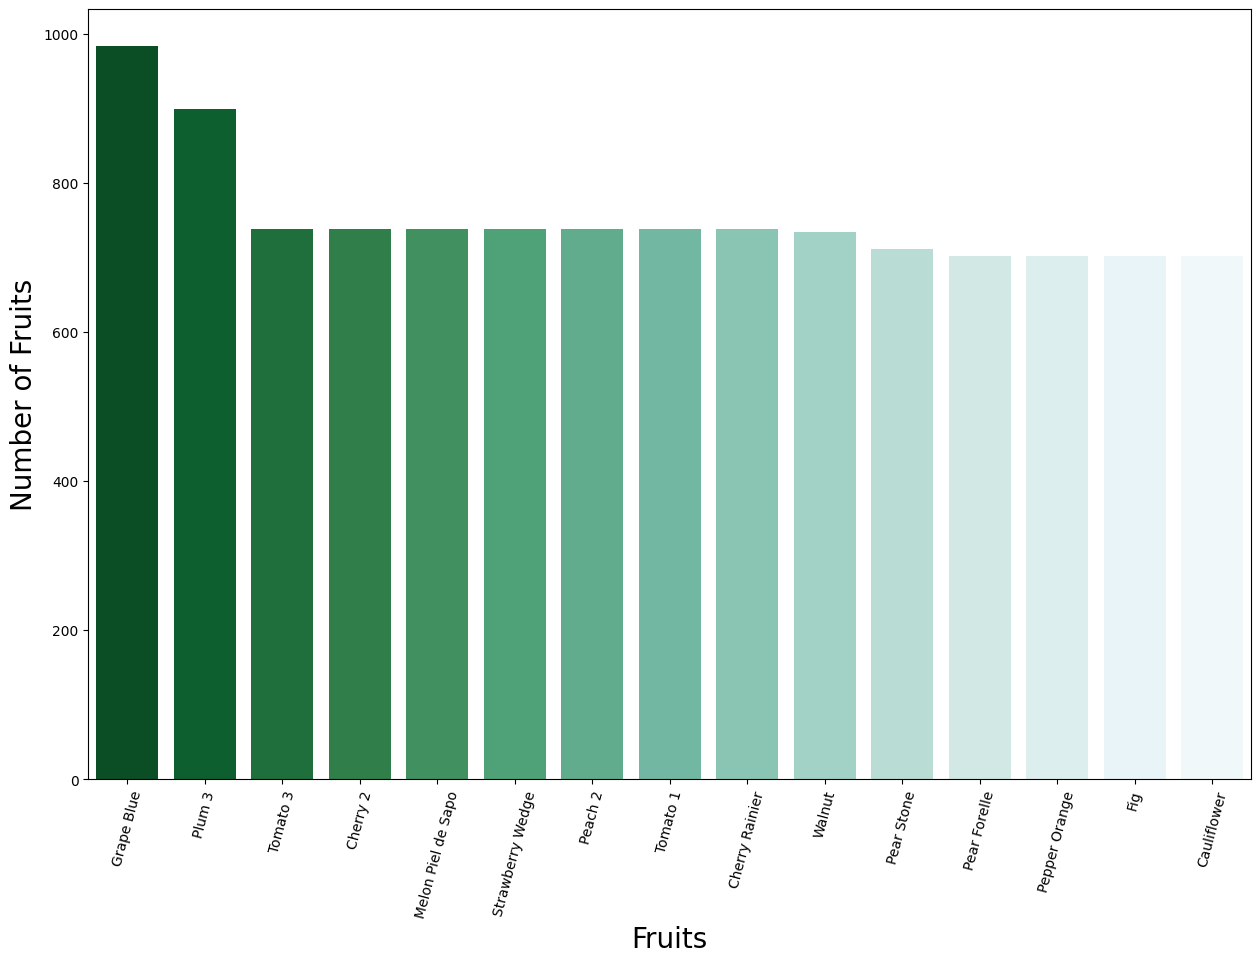

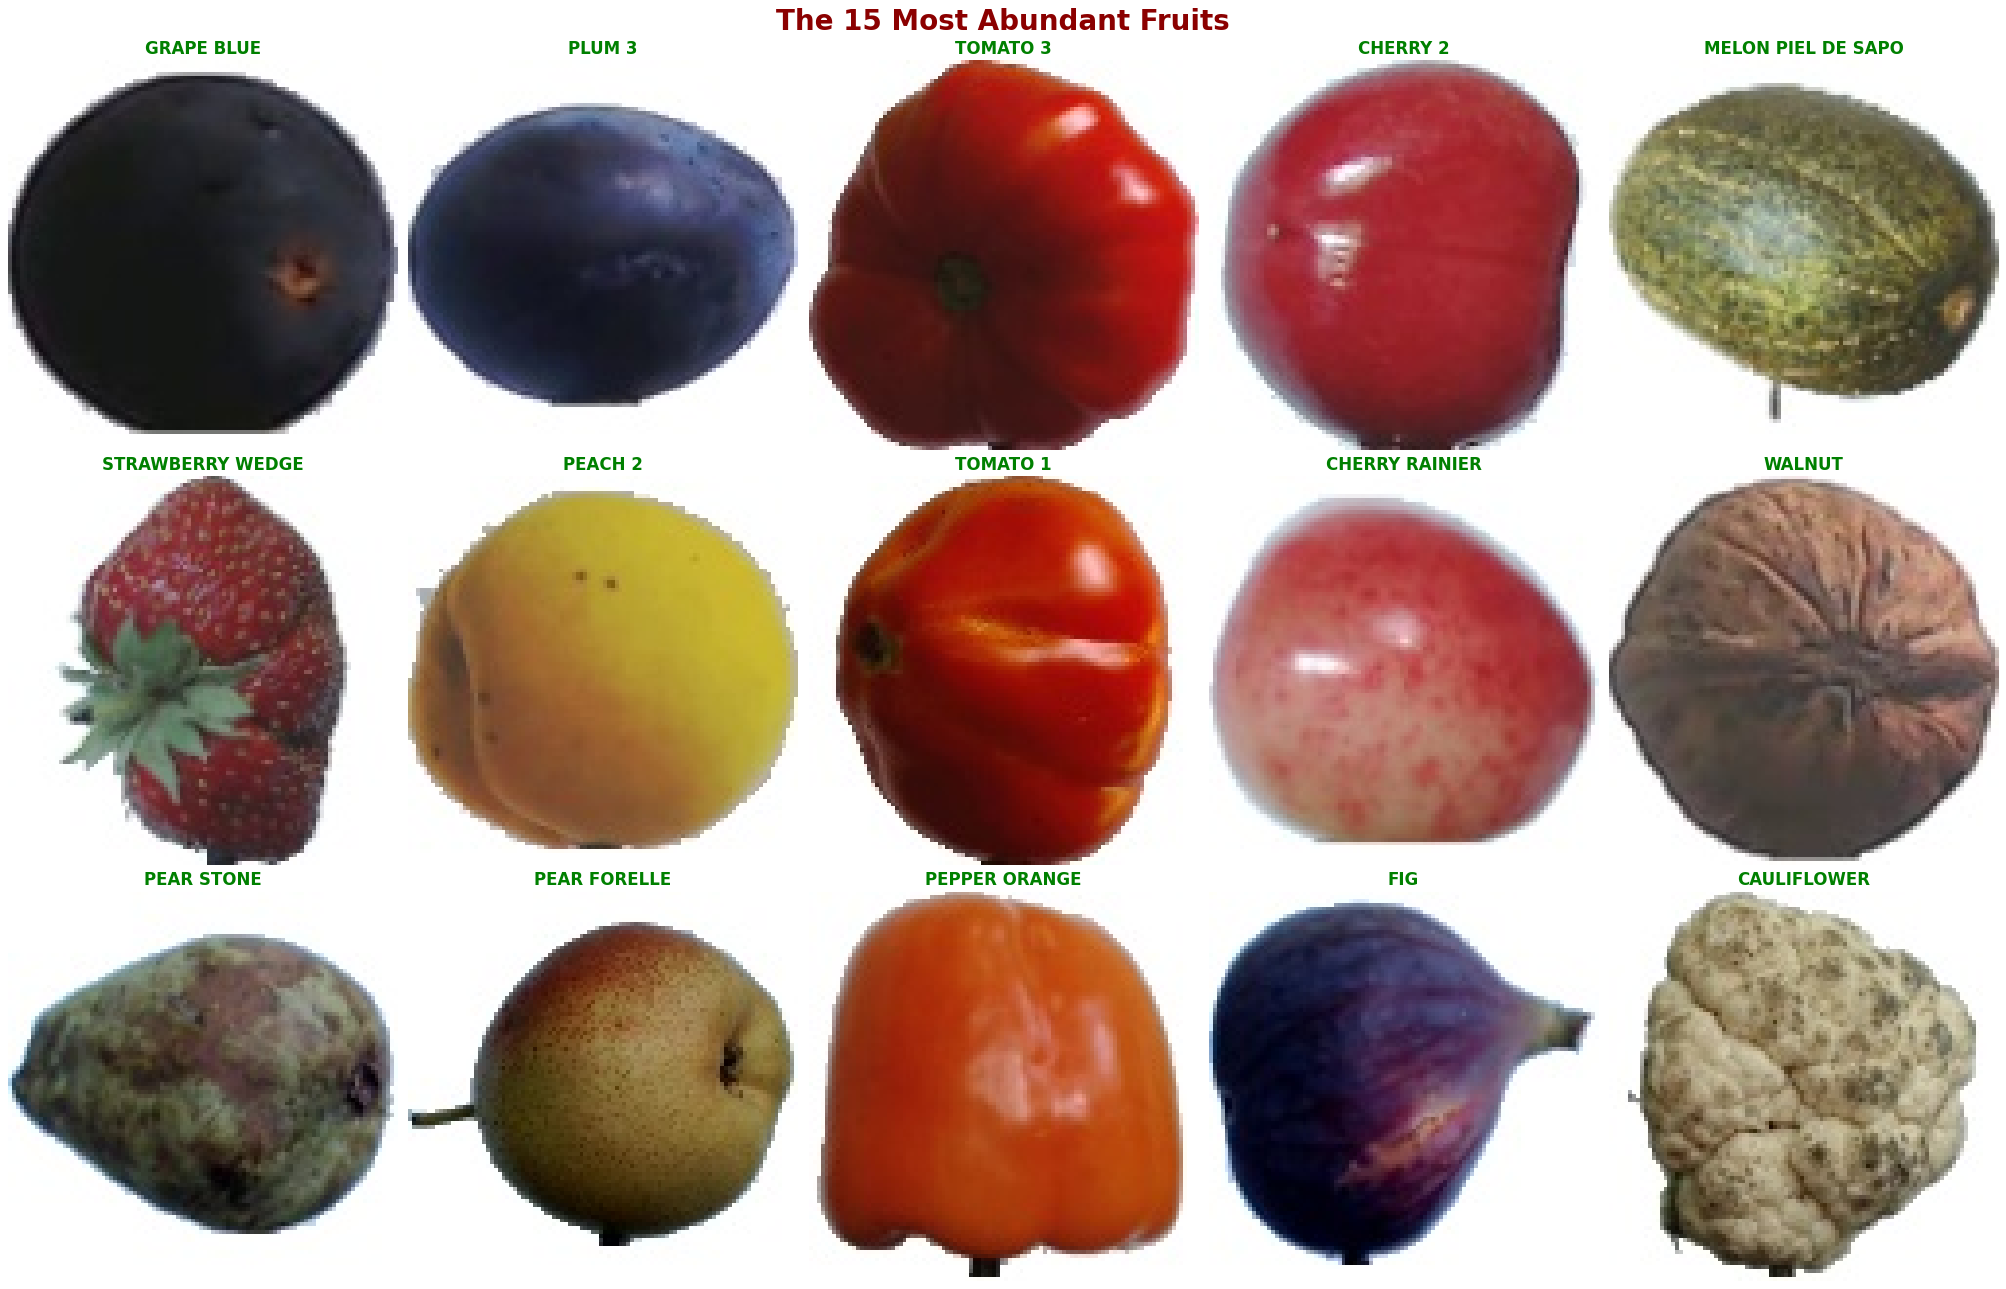

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                   

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F1166105%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240405%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240405T004559Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D44ecaa6fbc67cfdb98149c3c767d4f0f03c0e83bc07e98ffd48d559a65db185368aeba5046dc441548f0b6929addba511cadbe1000a1645e8a97fd8bdacff88a482d12533ecc2e8c4e047c4f59297ff8cd13dd8b5af5a800b5a31e0d377c22b591535903a09ffbac26905f983049287b9f046359dc9842eb81a1ad9aee72e633f71a56e652f84f065d92c8978c2f1719d2c74d1a399fc08f6d8c1a9850c85db801a4f0030a185c5f8c9c4a414b4b97865c6a0b028e1313959147c200ebd50e2dbb428323cd9b015628b7247b58cb9cd69d3908c8099dbc5c7978df5001419e181ea31f2aa6c84ac3e0b68fc8ba6956cab4d0456bbb073ff63f04520d407db737'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# import model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files

train_dir = '/kaggle/input/fruits/fruits-360/Training/'
test_dir =  '/kaggle/input/fruits/fruits-360/Test/'


fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit
        fruits_image.append(i + '/' + image_filename)

train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

from collections import Counter
newData = Counter(train_fruits["Fruits"])
most_fruits = newData.most_common(15)

x = [fruit[0] for fruit in most_fruits]
y = [fruit[1] for fruit in most_fruits]

print("The 15 most frequently found fruits in the data set and their number")
most_fruits

print("The 15 most frequently found fruits in the dataset -- > \n ", x)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15))
plt.xlabel('Fruits', size = 20)
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.show()

plt.figure(figsize=(25, 16), dpi=80, facecolor='white', edgecolor='black', frameon=True, clear=False, layout='constrained')
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]

    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

# CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(15))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())